# Programación declarativa @ GIA - URJC
## Curso 22-23
## Convocatoria extraordinaria
## Prueba 1

La duración de la prueba es de 1 hora.


# Definiciones auxiliares

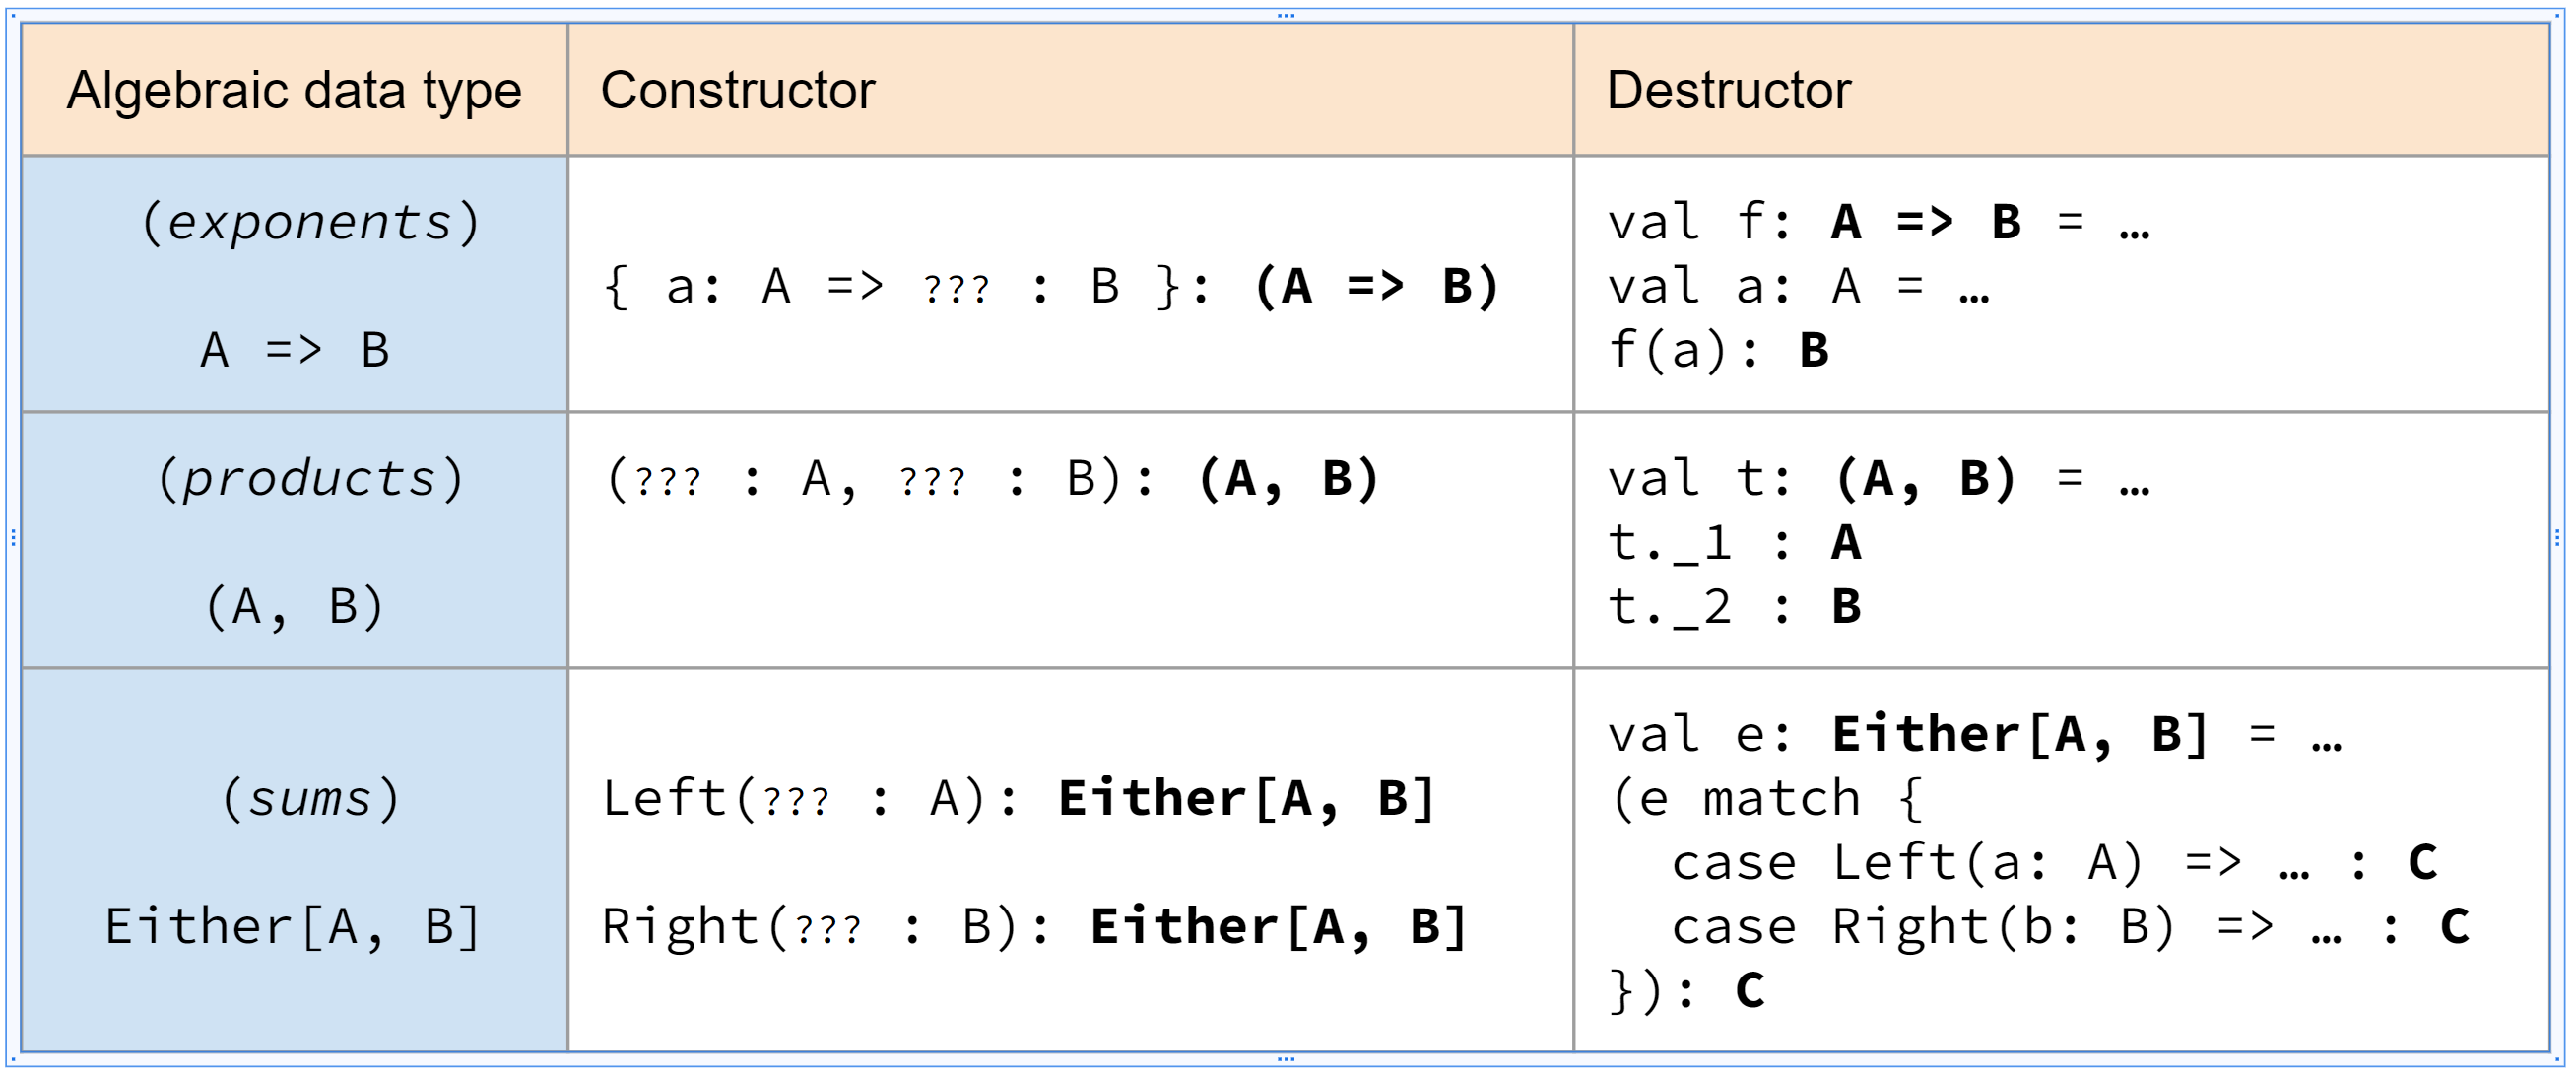

In [15]:
trait Isomorphic[A, B]{
    
    def from(a: A): B
    
    def to(b: B): A
    
    // laws
    
    def law1(a: A): Boolean = 
        to(from(a)) == a
    
    def law2(b: B): Boolean = 
        from(to(b)) == b
}

defined trait Isomorphic

In [16]:
object StandardTypes{
    
    // type Option[X] = 1 + X
    
    sealed trait Option[+X]
    case object None extends Option[Nothing]
    case class Some[A](a: A) extends Option[A]
    
    // type Either[X, Y] = X + Y
    
    sealed trait Either[X, Y]
    case class Left[X, Y](x: X) extends Either[X, Y]
    case class Right[X, Y](y: Y) extends Either[X, Y]
}

defined object StandardTypes

In [2]:
def compose[A, B, C](g: B => C, f: A => B): A => C = 
    (a: A) => g(f(a))

defined function compose

# Ejercicio 1
__(1 punto)__

Dada la siguiente función-método:

In [1]:
def product(a: Int, d: Int, n: Int): Int = {
    var out: Int = 1
    for (i <- a to (a+(n-1)*d) by d)
        out *= i
    out
}  

defined function product

__a) (0,5 puntos)__ Declara una variable inmutable `productV` que implemente la función `product` mediante una expresión lambda, es decir, mediante una función-valor __no__ currificada. Indica también explícitamente el tipo de la variable `productV`.

In [5]:
// val productV: ? = ???

val productV: (Int, Int, Int) => Int = 
    (a, d, n) => {
        var out: Int = 1
        for (i <- a to (a+(n-1)*d) by d)
            out *= i
        out
    }  

productV: (Int, Int, Int) => Int = ammonite.$sess.cmd4$Helper$$Lambda$1951/1056496954@22ba62de

__b) (0,5 puntos)__ Implementa la función-método `product` mediante una función-valor __currificada__. 

In [6]:
val productV: Int => Int => Int => Int = 
    a => d => n => {
        var out: Int = 1
        for (i <- a to (a+(n-1)*d) by d)
            out *= i
        out
    }  

productV: Int => Int => Int => Int = ammonite.$sess.cmd5$Helper$$Lambda$1954/940823619@539ca874

# Ejercicio 2
__(1,5 puntos)__

__a) (0,5 puntos)__ ¿Cuántas funciones hay del tipo `Either[Unit => Boolean, (Unit, Boolean => Unit)]`? Justifica tu respuesta mediante la correspondencia entre tipos algebraicos de datos y los distintos operadores aritméticos.

_Nota_: Puedes escribir la exponenciación de dos números _x_ e _y_ como _x^y_.


|Either[Unit => Boolean, (Unit, Boolean => Unit)]|

    = |Unit => Boolean| + |(Unit, Boolean => Unit)|
    
    = |Boolean|^|Unit| + |Unit|*|Boolean => Unit|
    
    = 2^1 + 1*|Unit|^|Boolean|
    
    = 2 + 1*1^2
    
    = 3

__b) (1 punto)__ Implementa *todos* los valores del tipo `Either[Unit => Boolean, (Unit, Boolean => Unit)`

In [7]:
val e1: Either[Unit => Boolean, (Unit, Boolean => Unit)] = 
    Left(_ => false)

val e2: Either[Unit => Boolean, (Unit, Boolean => Unit)] = 
    Left(_ => true)

val e3: Either[Unit => Boolean, (Unit, Boolean => Unit)] = 
    Right(((), _ => ()))

e1: Either[Unit => Boolean, (Unit, Boolean => Unit)] = Left(
  value = ammonite.$sess.cmd6$Helper$$Lambda$2197/2109968878@4707ff69
)
e2: Either[Unit => Boolean, (Unit, Boolean => Unit)] = Left(
  value = ammonite.$sess.cmd6$Helper$$Lambda$2198/1780986809@d3eb6b8
)
e3: Either[Unit => Boolean, (Unit, Boolean => Unit)] = Right(
  value = ((), ammonite.$sess.cmd6$Helper$$Lambda$2199/1692944482@74b4c81d)
)

# Ejercicio 3
__(2 puntos)__

__a) (1,5 puntos)__ Implementa la siguiente variante de la función de orden superior `compose` estudiada en clase: 

In [10]:
def compose2[A, B, C, D](g: (B, C) => D, f: A => (B, C)): A => D = 
    (a: A) => f(a) match { case (b, c) => g(b,c) }
    

defined function compose2

__b) (0,5 puntos)__ La librería estándar de Scala proporciona un método de la clase `Function2[A, B, C]` denomianado `tupled`, que convierte la función de dos argumentos en una función de un argumento consistente en una tupla. Por ejemplo:

In [13]:
val f2: (Int, String) => Int = (i, s) => i+s.length
val f1: ((Int, String)) => Int = f2.tupled

f2: (Int, String) => Int = ammonite.$sess.cmd12$Helper$$Lambda$2329/2114043720@6cfb399
f1: ((Int, String)) => Int = scala.Function2$$Lambda$578/1655552834@26d0e025

de tal manera que $\forall x: \mathtt{Int}, \forall y: \mathtt{String}: f2(x,y)=f2.\mathtt{tupled}((x,y))$

Implementa la función `compose2` mediante el método `tupled` y la función de orden superior `compose`.

In [24]:
def compose2[A, B, C, D](g: (B, C) => D, f: A => (B, C)): A => D = 
    g.tupled compose f

defined function compose2

# Ejercicio 4
__(3 puntos)__

Demostrar que los tipos `(Either[P, Q], Either[R, S])` y `Either[(P, R), Either[(P, S), Either[(Q, R), (Q, S)]]]` son isomorfos, para todo tipo `P`, `Q`, `R` y `S`.

In [23]:
class Iso[P, Q, R, S] extends Isomorphic[(Either[P, Q], Either[R, S]), Either[(P, R), Either[(P, S), Either[(Q, R), (Q, S)]]]]{
    
    def from(t: (Either[P, Q], Either[R, S])): Either[(P, R), Either[(P, S), Either[(Q, R), (Q, S)]]] = 
        t match {
            case (Left(p), Left(r)) =>
                Left((p,r))
            case (Left(p), Right(s)) =>
                Right(Left((p,s)))
            case (Right(q), Left(r)) =>
                Right(Right(Left((q,r))))
            case (Right(q), Right(s)) =>
                Right(Right(Right((q,s))))
        }
    
    def to(e: Either[(P, R), Either[(P, S), Either[(Q, R), (Q, S)]]]): (Either[P, Q], Either[R, S]) = 
        e match {
            case Left((p, r)) =>
                (Left(p), Left(r))
            case Right(Left((p, s))) =>
                (Left(p), Right(s))
            case Right(Right(Left((q, r)))) =>
                (Right(q), Left(r))
            case Right(Right(Right((q, s)))) =>
                (Right(q), Right(s))
        }
}

defined class Iso

# Ejercicio 5
__(2,5 puntos)__

Demostrar que los tipos `((Y, Either[Z, V])) => X` y `(Z => Y => X, V => Y => X)` son isomorfos, para todo tipo `X`, `Y`, `Z` y `V`.

In [22]:
class Iso[X, Y, Z, V] extends Isomorphic[((Y, Either[Z, V])) => X, (Z => Y => X, V => Y => X)]{
    
    def from(t: ((Y, Either[Z, V])) => X): (Z => Y => X, V => Y => X) = 
        (z => y => t((y, Left(z))), 
         v => y => t((y, Right(v))))
    
    def to(t: (Z => Y => X, V => Y => X)): ((Y, Either[Z, V])) => X = {
        case (y, Left(z)) => t._1(z)(y)
        case (y, Right(v)) => t._2(v)(y)
    }
        
}

defined class Iso